In [2]:
#Importing Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler


In [5]:
#Code to load data from local files
# from google.colab import files
# def getLocalFiles():
#     _files = files.upload()
#     if len(_files) >0:
#        for k,v in _files.items():
#          open(k,'wb').write(v)
# getLocalFiles()

Saving FB.csv to FB.csv


In [6]:
data = pd.read_csv('FB.csv' , date_parser=True)

In [7]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-09-01,126.379997,126.629997,125.599998,126.169998,126.169998,13536100
1,2016-09-02,126.849998,126.860001,126.000000,126.510002,126.510002,12118800
2,2016-09-06,126.669998,129.940002,126.470001,129.729996,129.729996,26278400
3,2016-09-07,130.039993,131.979996,129.949997,131.050003,131.050003,27990800
4,2016-09-08,130.919998,131.080002,129.809998,130.270004,130.270004,15676600


In [8]:

data.shape

(1258, 7)

In [9]:
#Splitting DataSet for test and train
data_train = data[data['Date'] < '2021-01-01'].copy()

In [10]:
data_train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-09-01,126.379997,126.629997,125.599998,126.169998,126.169998,13536100
1,2016-09-02,126.849998,126.860001,126.000000,126.510002,126.510002,12118800
2,2016-09-06,126.669998,129.940002,126.470001,129.729996,129.729996,26278400
3,2016-09-07,130.039993,131.979996,129.949997,131.050003,131.050003,27990800
4,2016-09-08,130.919998,131.080002,129.809998,130.270004,130.270004,15676600
...,...,...,...,...,...,...,...
1086,2020-12-24,268.880005,270.399994,266.200012,267.399994,267.399994,6702000
1087,2020-12-28,268.739990,277.299988,265.660004,277.000000,277.000000,23299700
1088,2020-12-29,276.950012,280.510010,276.279999,276.779999,276.779999,16383000
1089,2020-12-30,277.950012,278.079987,271.709991,271.869995,271.869995,11803800


In [11]:
data_test = data[data['Date'] >= '2021-01-01'].copy()

In [12]:
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
1091,2021-01-04,274.779999,275.000000,265.200012,268.940002,268.940002,15106100
1092,2021-01-05,268.290009,272.399994,268.209991,270.970001,270.970001,9871600
1093,2021-01-06,262.000000,267.750000,260.010010,263.309998,263.309998,24354100
1094,2021-01-07,265.899994,271.609985,264.779999,268.739990,268.739990,15789800
1095,2021-01-08,268.309998,268.950012,263.179993,267.570007,267.570007,18528300
...,...,...,...,...,...,...,...
1253,2021-08-25,365.600006,370.859985,365.399994,368.390015,368.390015,9684500
1254,2021-08-26,368.380005,369.440002,364.130005,364.380005,364.380005,7888700
1255,2021-08-27,365.100006,373.739990,364.079987,372.630005,372.630005,11214200
1256,2021-08-30,372.559998,381.489990,370.519989,380.660004,380.660004,13547300


In [13]:
#Selecting closing stock price column
training_set = data_train.iloc[:,4:5]

In [14]:
training_set

,Close
0,126.169998
1,126.510002
2,129.729996
3,131.050003
4,130.270004
...,...
1086,267.399994
1087,277.000000
1088,276.779999
1089,271.869995


In [15]:
#Scaling
scaler = MinMaxScaler()
training_set_scaled = scaler.fit_transform(training_set)

In [16]:
#Creating Dataset
X_train = []
Y_train=[]

#Consider previous 100 days to predict the output of 60 day , (change and check while training model)

for i in range(60 , training_set_scaled.shape[0]):
  X_train.append(training_set_scaled[i - 60:i])
  Y_train.append(training_set_scaled[i,0])

In [17]:
X_train , Y_train = np.array(X_train) , np.array(Y_train)

In [18]:
X_train.shape

(1031, 60, 1)

In [19]:
regressor_model =  tf.keras.Sequential()
regressor_model.add(tf.keras.layers.LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor_model.add(tf.keras.layers.Dropout(rate = 0.20))
regressor_model.add(tf.keras.layers.LSTM(units = 50, return_sequences = True ))
regressor_model.add(tf.keras.layers.Dropout(rate = 0.20))

regressor_model.add(tf.keras.layers.LSTM(units = 50, return_sequences = True ))
regressor_model.add(tf.keras.layers.Dropout(rate = 0.20))

regressor_model.add(tf.keras.layers.LSTM(units = 50, return_sequences = False ))
regressor_model.add(tf.keras.layers.Dropout(rate = 0.20))

In [20]:
regressor_model.add(tf.keras.layers.Dense(units=1))

In [21]:
regressor_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

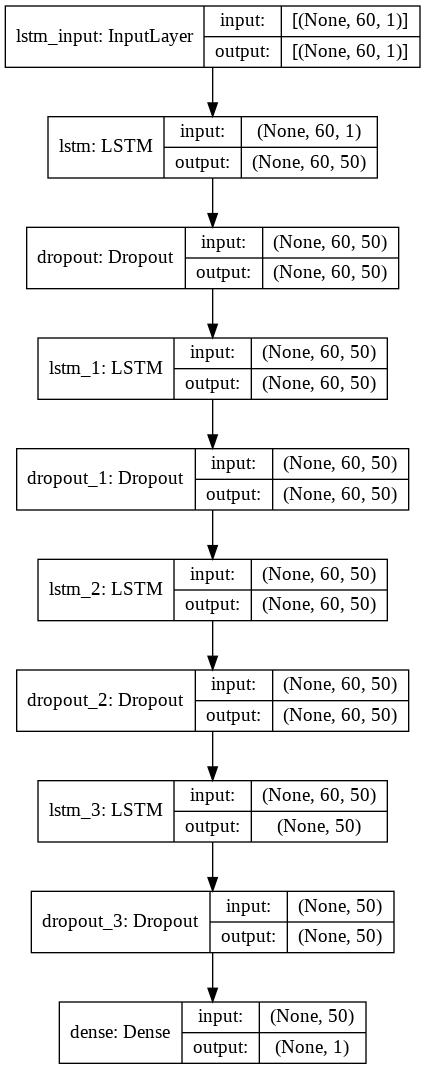

In [22]:
tf.keras.utils.plot_model(regressor_model , show_shapes=True)

In [181]:
regressor_model.compile(loss='mean_squared_error' , optimizer='adam')

In [182]:
regressor_model.fit(X_train , Y_train , epochs=50 , batch_size=32)

Epoch 1/50
33/33 [==============================] - 11s 130ms/step - loss: 0.0268
Epoch 2/50
33/33 [==============================] - 4s 126ms/step - loss: 0.0064
Epoch 3/50
33/33 [==============================] - 4s 133ms/step - loss: 0.0055
Epoch 4/50
33/33 [==============================] - 5s 136ms/step - loss: 0.0049
Epoch 5/50
33/33 [==============================] - 5s 139ms/step - loss: 0.0048
Epoch 6/50
33/33 [==============================] - 5s 138ms/step - loss: 0.0045
Epoch 7/50
33/33 [==============================] - 4s 136ms/step - loss: 0.0044
Epoch 8/50
33/33 [==============================] - 4s 133ms/step - loss: 0.0047
Epoch 9/50
33/33 [==============================] - 4s 130ms/step - loss: 0.0042
Epoch 10/50
33/33 [==============================] - 4s 134ms/step - loss: 0.0044
Epoch 11/50
33/33 [==============================] - 4s 134ms/step - loss: 0.0045
Epoch 12/50
33/33 [==============================] - 4s 134ms/step - loss: 0.0039
Epoch 13/50
33/33 [=====

In [183]:
testing_prep = data_train.tail(60)

In [184]:
testing_prep

,Date,Open,High,Low,Close,Adj Close,Volume
1031,2020-10-07,259.209991,260.179993,254.820007,258.119995,258.119995,23133400
1032,2020-10-08,259.750000,264.619995,259.149994,263.760010,263.760010,16312800
1033,2020-10-09,264.519989,264.750000,262.170013,264.450012,264.450012,14107800
1034,2020-10-12,270.200012,280.179993,267.869995,275.750000,275.750000,31019300
1035,2020-10-13,277.579987,279.100006,273.390015,276.140015,276.140015,18063300
1036,2020-10-14,277.619995,278.750000,271.500000,271.820007,271.820007,15577800
1037,2020-10-15,267.600006,269.040009,263.670013,266.720001,266.720001,15416100
1038,2020-10-16,267.380005,271.369995,265.299988,265.929993,265.929993,16622700
1039,2020-10-19,265.529999,268.549988,259.880005,261.399994,261.399994,13587000
1040,2020-10-20,263.059998,269.700012,262.880005,267.559998,267.559998,18763200


In [185]:
testing_prep = testing_prep.append(data_test , ignore_index=True)

In [186]:
testing_set = testing_prep.iloc[:,4:5]
testing_prep.shape

(227, 7)

In [187]:
testing_set.shape
testing_set = scaler.transform(testing_set)
testing_set

array([[0.75754523],
       [0.7874087 ],
       [0.79106221],
       [0.85089482],
       [0.85295992],
       [0.83008579],
       [0.80308163],
       [0.7988986 ],
       [0.77491258],
       [0.80752936],
       [0.86667376],
       [0.86344377],
       [0.89876101],
       [0.85809584],
       [0.89081862],
       [0.80811188],
       [0.87779298],
       [0.78396686],
       [0.77470074],
       [0.79556277],
       [0.91247485],
       [0.95112776],
       [0.94440326],
       [0.86688544],
       [0.83331563],
       [0.85476018],
       [0.84734715],
       [0.8572488 ],
       [0.86789149],
       [0.84692363],
       [0.83088   ],
       [0.83601609],
       [0.81886057],
       [0.81213592],
       [0.85708996],
       [0.85004761],
       [0.86180236],
       [0.85735464],
       [0.90807998],
       [0.91321606],
       [0.88319391],
       [0.87180985],
       [0.90294389],
       [0.89140099],
       [0.86238488],
       [0.85814885],
       [0.83924592],
       [0.842

In [188]:
#Preparing Train Dataset
X_test = []
Y_test = []

for i in range(60 , testing_set.shape[0]):
  X_test.append(testing_set[i - 60:i])
  Y_test.append(testing_set[i,0])

In [189]:
X_test , Y_test = np.array(X_test) , np.array(Y_test)

In [190]:
Y_pred = regressor_model.predict(X_test)

In [191]:
Y_pred.shape

(167, 1)

In [192]:
Y_test = np.array(Y_test)
Y_test

array([0.81483638, 0.82558507, 0.78502591, 0.81377733, 0.80758235,
       0.75076772, 0.72032189, 0.72323412, 0.69146455, 0.72175155,
       0.77332417, 0.80710583, 0.8356454 , 0.84427616, 0.86286141,
       0.8842528 , 0.83178021, 0.79397435, 0.75865712, 0.77814257,
       0.80498773, 0.80271095, 0.80186374, 0.81038866, 0.80234027,
       0.81753684, 0.83035048, 0.82251409, 0.82309645, 0.84146986,
       0.83935192, 0.81721916, 0.77575979, 0.76924697, 0.79852791,
       0.79032084, 0.73938366, 0.75489776, 0.79349783, 0.76220479,
       0.74319602, 0.75500377, 0.790162  , 0.7426665 , 0.79789255,
       0.79344483, 0.84099333, 0.81197707, 0.84030497, 0.86958591,
       0.89463098, 0.86609124, 0.9269299 , 0.94509163, 0.92968337,
       0.88472949, 0.8667266 , 0.88938889, 0.93068942, 0.91575768,
       0.95033355, 0.97220163, 1.02647464, 1.01244311, 1.04860739,
       1.04823671, 1.04527156, 1.04040032, 1.03097536, 0.99422854,
       1.02070318, 1.01201943, 0.9911574 , 0.99332834, 0.98708

In [193]:
s = scaler.scale_
f = 1/s
f

array([188.860001])

In [194]:
Y_pred = Y_pred * f

In [195]:
Y_test = Y_test * f

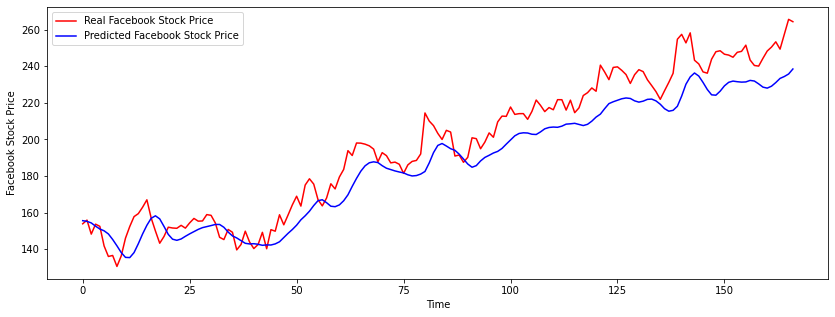

In [196]:
plt.figure(figsize=(14,5))
plt.plot(Y_test , color = 'red' , label = "Real Facebook Stock Price")
plt.plot(Y_pred  , color = 'blue' , label = "Predicted Facebook Stock Price")
plt.xlabel('Time')
plt.ylabel('Facebook Stock Price')
plt.legend()
plt.show()

6/6 [==============================] - 0s 3ms/step - loss: 0.0000e+00


0.0